In [35]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [32]:
# Downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
# Loading the dataset
file_path = "/content/Preprocessed Fake Reviews Detection Dataset.csv"
df = pd.read_csv('/content/Preprocessed Fake Reviews Detection Dataset.csv')

In [6]:
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5,1,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5,1,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5,1,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1,1,miss inform use great product price i
4,4,Home_and_Kitchen_5,5,1,veri nice set good qualiti we set two month


In [8]:
df.tail()

,Unnamed: 0,category,rating,label,text_
40427,40427,Clothing_Shoes_and_Jewelry_5,4,0,i read review say bra ran small i order two ba...
40428,40428,Clothing_Shoes_and_Jewelry_5,5,1,i n't sure exactli would it littl larg small s...
40429,40429,Clothing_Shoes_and_Jewelry_5,2,0,you wear hood wear hood wear jacket without ho...
40430,40430,Clothing_Shoes_and_Jewelry_5,1,1,i like noth dress the reason i gave star i ord...
40431,40431,Clothing_Shoes_and_Jewelry_5,5,0,i work wed industri work long day foot outsid ...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40432 non-null  int64 
 1   category    40432 non-null  object
 2   rating      40432 non-null  int64 
 3   label       40432 non-null  int64 
 4   text_       40431 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.5+ MB


In [10]:
df.describe()

,Unnamed: 0,rating,label
count,40432.000000,40432.000000,40432.000000
mean,20215.500000,4.256579,0.500000
std,11671.857379,1.144354,0.500006
min,0.000000,1.000000,0.000000
25%,10107.750000,4.000000,0.000000
50%,20215.500000,5.000000,0.500000
75%,30323.250000,5.000000,1.000000
max,40431.000000,5.000000,1.000000


In [11]:
df.shape

(40432, 5)

In [12]:
df.columns

Index(['Unnamed: 0', 'category', 'rating', 'label', 'text_'], dtype='object')

In [13]:
df.isnull()

,Unnamed: 0,category,rating,label,text_
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
40427,False,False,False,False,False
40428,False,False,False,False,False
40429,False,False,False,False,False
40430,False,False,False,False,False


In [14]:
df.isnull().sum()

,0
Unnamed: 0,0
category,0
rating,0
label,0
text_,1


In [15]:
df.dropna(inplace=True)

In [26]:
print(df['Cleaned_rating'].head())


0    
1    
2    
3    
4    
Name: Cleaned_rating, dtype: object


In [29]:
# Text Preprocessing
nltk.download('stopwords')
def preprocess_text(text):
    # Convert the input to string before applying regex
    text = str(text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Removing special characters
    text = text.lower()  # Converting to lowercase
    text = text.split()  # Tokenization
    text = [word for word in text if word not in stopwords.words('english')]  # Removing stopwords
    return ' '.join(text)

# Cleaning the Text
df['Cleaned_category'] = df['category'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Cleaning the Text
df['Cleaned_category'] = df['category'].apply(preprocess_text)# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_category']).toarray()
y = df['label']  # 1 for Fake, 0 for Genuine

In [38]:
# Train-Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Training the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Predicting the Model
y_pred = model.predict(X_test)

In [42]:
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      4069
           1       0.49      0.50      0.49      4018

    accuracy                           0.49      8087
   macro avg       0.49      0.49      0.49      8087
weighted avg       0.49      0.49      0.49      8087



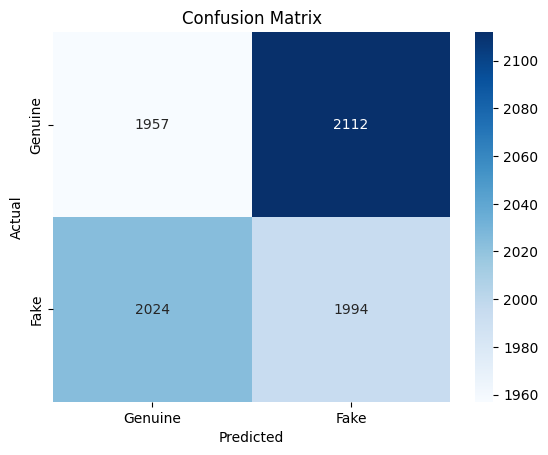

In [44]:
# Applying Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()